<a href="https://colab.research.google.com/github/Sangyeonglee353/ai-hongong/blob/main/Chapter_07_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%8B%9C%EC%9E%91%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch07-1 | 인공 신경망

## 패션 MNIST

In [2]:
# 1. 패션 MNIST 데이터셋 가져오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# 2. 데이터의 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
# 3. 테스트 세트의 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


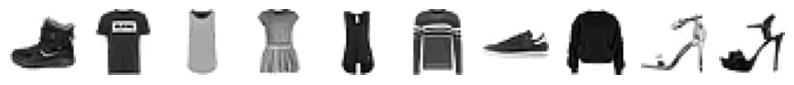

In [5]:
# 4. 샘플을 이미지로 확인
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [6]:
# 5. 처음 10개의 샘플의 타깃값을 리스트로 만들어 출력 | 리스트 내포 사용
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
# 6. 레이블 당 샘플 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [8]:
# 1. 2차원 배열인 각 샘플을 1차원 배열로 펼치기 | reshape() 사용
# [결과]
# 1.1 reshape() 메서드의 두 번째 매개변수를 28x28 이미지 크기에 맞게 지정하면
# 1.2 첫 번째 차원(샘플 개수)은 변하지 않고
# 1.3 원본 데이터의 두 번째, 세번째 차원이 1차원으로 합쳐짐
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [9]:
# 2. 변환된 train_scaled 값 확인
print(train_scaled.shape)

(60000, 784)


In [10]:
# 3. 교차 검증 성능 확인 | cross_validate()
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [11]:
# 4.1 반복 횟수 변경(max_iter=9)
# [결론] 성능 크게 향상 x
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303666666666667


In [12]:
# 4.2 반복 횟수 변경(max_iter=20)
# [결론] 성능 크게 향상 x
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8436666666666666


###  텐서플로와 케라스

In [13]:
# 1. 텐서플로에서 케라스 임포트
from tensorflow import keras

## 인공 신경망으로 모델 만들기

In [14]:
# 1. 검증 세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [15]:
# 2. 훈련 세트(80%) / 검증 세트(20%) 크기 확인
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [16]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [18]:
# 3. 밀집층 만들기 | keras.layers.dense() 사용
# 10 / 뉴런 개수
# activation = 'softmax' / 뉴런의 출력에 적용할 함수
# input_shape = (784,) / 입력의 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [19]:
# 4. 신경망 모델 만들기 | keras.Sequential() 사용
model = keras.Sequential(dense)

## 인공 신경망으로 패션 아이템 분류하기

In [22]:
# 1. 케라스 모델 설정 단계(추가)| complie() 사용
# 1.1 loss = 'sparse_categorical_crossentropy' / 정수로된 타깃값을 사용해 크로스 엔트로피 계산
# 1.2 metrics = 'accuracy' / 에포크마다 손실값과 함께 정확도를 함께 출력
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [23]:
# 2. 패션 MNIST 데이터의 타깃값 확인
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [24]:
# 3. 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6088 - accuracy: 0.7953
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4747 - accuracy: 0.8408
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4509 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4383 - accuracy: 0.8516
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4290 - accuracy: 0.8544


In [26]:
# 4. 모델 성능 확인 | 검증 세트 이용, evaluate() 사용
# [결과] 검증 세트의 점수는 훈련 세트보다 조금 낮은 것이 일반적
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8484


[0.4412524402141571, 0.8484166860580444]

In [ ]:
# 전체 소스 코드: https:/bit.ly/hg-07-01

# Ch07-2 | 심층 신경망

## 2개의 층

In [1]:
# 1. Keras API로 패션 MNIST 데이터셋 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 2. 훈련 세트와 검증 세트로 나누기
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 3. 은닉층(시그모이드 함수) / 출력층(소프트맥스 함수)
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기

In [5]:
# 1. 심층 신경망 만들기
# [주의] 항상 출력층을 마지막 매개 변수로 넣어야 함.
model = keras.Sequential([dense1, dense2])

In [7]:
# 2. 층의 정보 추출  | keras.summary()
# 2.1 [출력 크기] None: 샘플 개수가 정의되지 않았으므로 > 어떤 배치 크기에도 유연하게 대응
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 층을 추가하는 다른 방법

In [11]:
# 1. keras.Sequential() 매개변수에 바로 작성
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [12]:
# 2. 층의 정보 추출
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 1. keras.add()로 층 추가
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [22]:
# 2. 층의 정보 추출
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# 3. 모델 설정 및 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5726 - accuracy: 0.8052
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4119 - accuracy: 0.8518
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8640
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8780


## 렐루 함수

In [27]:
# 1. 딥러닝 모델 생성 및 층 추가
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28), name='flatten'))
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [28]:
# 2. 층 정보 출력
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# 3. 데이터 준비
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [33]:
# 4. 모델 설정 및 훈련
# [결과] sigmoid 함수보다 약간 성능 향상
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3075 - accuracy: 0.8902
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2969 - accuracy: 0.8939
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2899 - accuracy: 0.8967
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2810 - accuracy: 0.8997
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2746 - accuracy: 0.9033


In [34]:
# 5. 검증 세트에서 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4489 - accuracy: 0.8638


[0.4489261209964752, 0.8638333082199097]

## 옵티마이저

In [36]:
# 1. 확률적 경사 하강법(sgd 적용)
# 방법 1
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 방법 2
sgd = keras.optimizers.SGD()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

# [번외] 학습률 변환  | default = 0.01
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [37]:
# [번외] 네스테로프 모멘텀 최적화
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

# [번외] Adagrad 옵티마이저
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

# [번외] RMSprops 옵티마이저
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categroical_crossentropy', metrics='accuracy')

In [39]:
# 2. adam 옵티마이저로 훈련
# 2.1 모델 생성 및 층 추가
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

# 2.2 모델 설정 및 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5297 - accuracy: 0.8152
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3956 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3562 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3287 - accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3080 - accuracy: 0.8884


In [40]:
# 3. 검증 세트로 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8772


[0.3489631712436676, 0.8771666884422302]

In [41]:
# 전체 소스 코드: https://bit.ly/hg-07-2

# Ch07-3 | 신경망 모델 훈련

## 손실 곡선

In [43]:
# 1. 패션 MNIST 데이터 적재 및 훈련 세트, 검증 세트로 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [46]:
# 2. 모델 생성 함수 정의
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax', name='output'))
  return model

In [47]:
# 3.모델 함수 테스트 및 층 결과 확인
model = model_fn()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# 4. 모델 설정 및 훈련 & history 변수에 담기
# verbose[0: 훈련 과정 출력 X, 2: 진행 막대 빼고 출력]
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [49]:
# 5. history 딕셔너리 확인
# [결과] 손실과 정확도값 포함
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


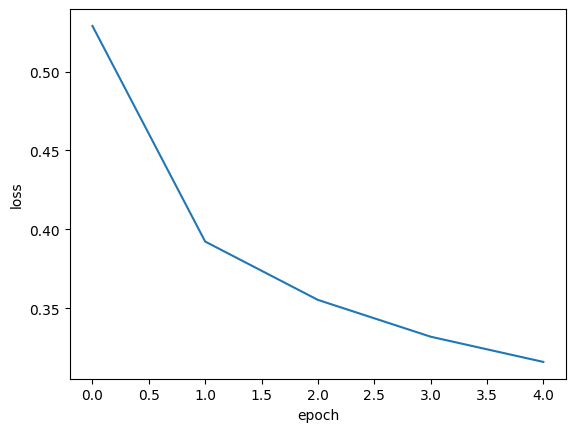

In [51]:
# 6. matplot으로 결과 확인
# 6.1 loss 값
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

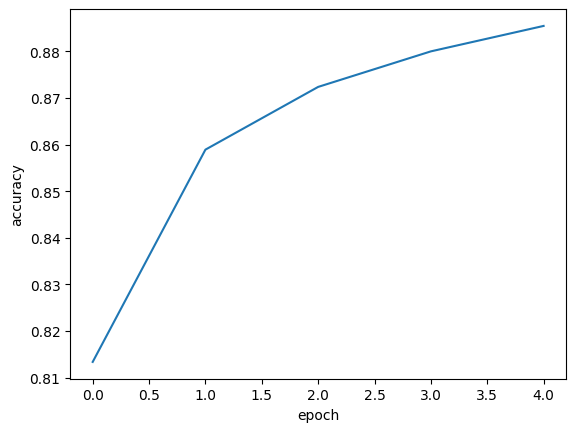

In [52]:
# 6.2 accuracy 값
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

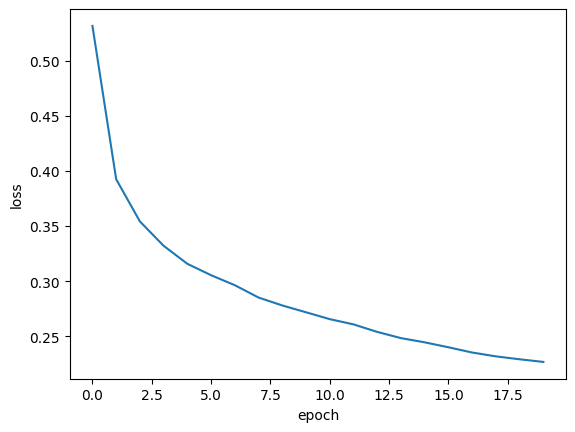

In [53]:
# 7. 에포크를 늘려서 결과 확인
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [55]:
# 1. 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터 전달
# [참고] validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [56]:
# 2. history.history 딕셔너리 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


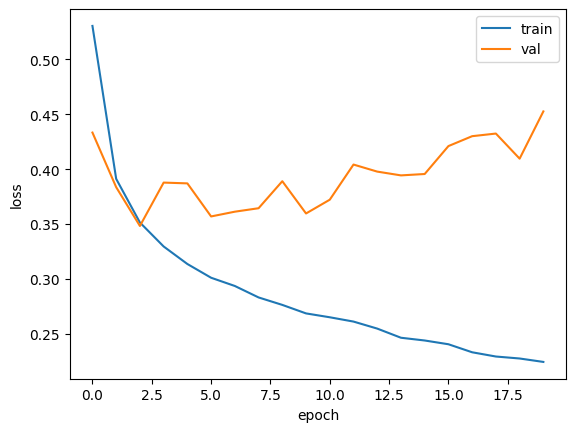

In [58]:
# 3. 훈련 손실과 검증 손실 matplot으로 확인하기
# [결과] 초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승 시작
# [결론] 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델 생성
# [후처리] 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐 아니라
#          검증 세트에 대한 정확도도 증가할 것으로 보임.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

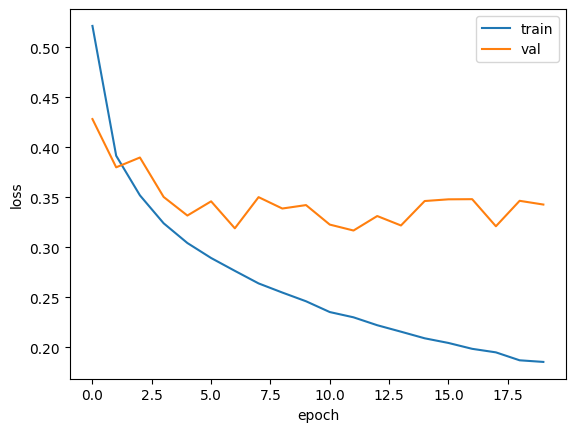

In [62]:
# 4. adam 옵티마이저로 과대적합 완화 테스트
# [결과] 과대적합 감소, 10번 째 epoch까지 감소 추세 이어짐
# [결론] Adam 옵티마이저가 이 데이터셋에 잘 맞다는 것을 보여줌
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭 아웃

In [63]:
# 1. 드롭 아웃 층 추가 | keras.layers.Dropout()
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


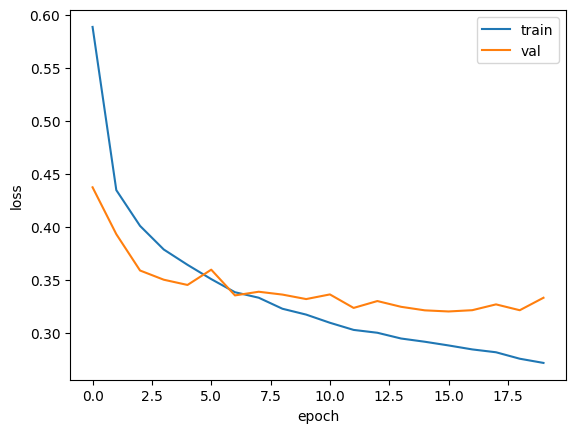

In [64]:
# 2. 훈련 손실과 검증 손실 그래프 확인
# [결과] 과대적합 감소
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [67]:
# 1. 에포크 횟수 10으로 지정후 모델 재훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [69]:
# 2. 훈련된 모델의 파라미터 저장 in 케라스 모델 | save_weights()
model.save_weights('model-weights.h5')

In [70]:
# 3. 모델 구조와 모델 파라미터 함께 저장 | save()
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
# 4. 파일 생성 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333352 Feb 12 11:22 model-weights.h5
-rw-r--r-- 1 root root 981200 Feb 12 11:23 model-whole.h5


In [72]:
# 실험 1. 훈련하지 않은 새로운 모델 만들고
#         model-weights.h5 파일에서 훈련된 모델 파라미터 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [73]:
# 실험 1.1 이 모델의 검증 정확도 확인
# [참고] evaluate()을 사용하지 않은 이유: 새로운 데이터에 대해 정확도만 계산하면 되는 상황이므로
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 3s 6ms/step
0.88075


In [74]:
# 실험 1.2 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8808


[0.3187105655670166, 0.8807500004768372]

## 콜백

In [75]:
# 1. 콜백 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
# 2. 모델을 다시 읽어와 예측 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.8874


[0.31841015815734863, 0.887416660785675]

In [77]:
# 3. 조기 종료도 함께 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
# 4. 몇 번재 에포크에서 훈련이 중지 되었는지 확인
print(early_stopping_cb.stopped_epoch)

8


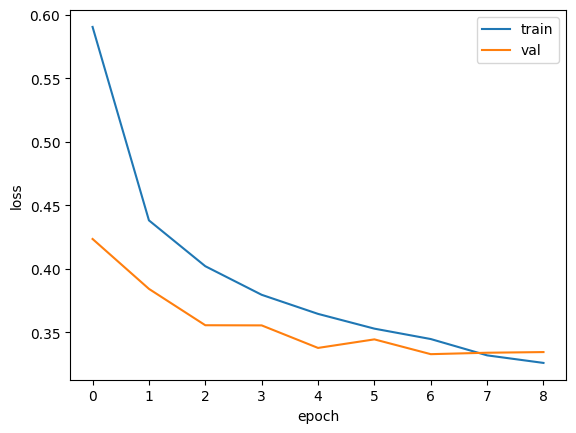

In [79]:
# 5. 훈련 손실과 검증 손실 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [80]:
# 6. 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3329 - accuracy: 0.8783


[0.3328796625137329, 0.878333330154419]

In [81]:
# 전체 소스 코드: https://bit.ly/hg-07-03